This notebook is for unsderstanding Logistic Regression of statsmodels

Reference : http://www.statsmodels.org/stable/discretemod.html

versions :  
- python 3.6.2  
- statsmodels 0.8.0  
- scikit-learn 0.19.1  

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix
import seaborn as sns
import statsmodels.api as sm

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Prepare Data

In [2]:
# load data to use
spector_data = sm.datasets.spector.load()

In [3]:
spector_data.exog_name

['GPA', 'TUCE', 'PSI']

In [4]:
# check features and target
print('X : ', spector_data.exog.shape)
print('Y : ', spector_data.endog.shape)

print('Feature names', spector_data.exog_name)
print('Target names', spector_data.endog_name)

X :  (32, 3)
Y :  (32,)
Feature names ['GPA', 'TUCE', 'PSI']
Target names GRADE


In [5]:
X = pd.DataFrame(spector_data.exog, columns=spector_data.exog_name)
X.head()

# types of data are all float64 
# X.dtypes

,GPA,TUCE,PSI
0,2.66,20.0,0.0
1,2.89,22.0,0.0
2,3.28,24.0,0.0
3,2.92,12.0,0.0
4,4.00,21.0,0.0


In [6]:
# target
Y = pd.DataFrame(spector_data.endog, columns=['target'], dtype=np.int16)

In [7]:
# check stats
X.describe()

,GPA,TUCE,PSI
count,32.000000,32.000000,32.000000
mean,3.117188,21.937500,0.437500
std,0.466713,3.901509,0.504016
min,2.060000,12.000000,0.000000
25%,2.812500,19.750000,0.000000
50%,3.065000,22.500000,0.000000
75%,3.515000,25.000000,1.000000
max,4.000000,29.000000,1.000000


In [8]:
Y.describe()

,target
count,32.000000
mean,0.343750
std,0.482559
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [9]:
# Correlation coefficient
Z = pd.concat([Y, X], axis=1)
Z.corr()

,target,GPA,TUCE,PSI
target,1.000000,0.497147,0.303055,0.422760
GPA,0.497147,1.000000,0.386986,0.039683
TUCE,0.303055,0.386986,1.000000,0.112780
PSI,0.422760,0.039683,0.112780,1.000000


target
0    21
1    11
dtype: int64

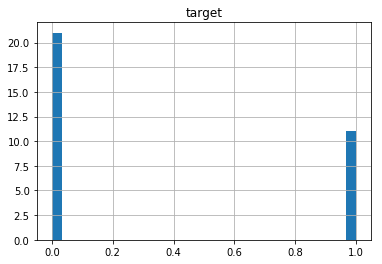

In [10]:
# check histgram of target data(0/1)
Y.hist(bins=30)

# count 0/1 respectively
Y.groupby(by='target').size()

# Modeling

In [11]:
# fit data to Logistic Regression
spector_data.exog = sm.add_constant(spector_data.exog) # add constant term to features

# split training data and validation data
X_train, X_val, Y_train, Y_val = train_test_split(spector_data.exog, spector_data.endog, test_size=0.2, random_state=42)

model = sm.Logit(Y_train, X_train)
result = model.fit()

# dispalay result 
# Notice : used summary2 instead because of AttributeError: module 'scipy.stats' has no attribute 'chisqprob'
result.summary2()

Optimization terminated successfully.
         Current function value: 0.445335
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            No. Iterations:   6.0000 
Dependent Variable: y                Pseudo R-squared: 0.290  
Date:               2019-02-13 10:22 AIC:              30.2667
No. Observations:   25               BIC:              35.1422
Df Model:           3                Log-Likelihood:   -11.133
Df Residuals:       21               LL-Null:          -15.672
Converged:          1.0000           Scale:            1.0000 
---------------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
---------------------------------------------------------------
const     -9.9940    4.9285  -2.0278  0.0426  -19.6537  -0.3342
x1         2.2619    1.2847   1.7607  0.0783   -0.2559   4.7798
x2         0.0417    0.1406   0.2963  0.7670   -0.2339   0.3172
x3         2.4168    1.1454   2.1100  0.0349    0.1719   4.6617
==============================================================

"""

In [12]:
# dispalay estimated params
result.params

array([-9.99396783,  2.26193991,  0.04166094,  2.4168031 ])

# Predict

In [13]:
# predict : returned scores range from 0 to 1 and they can be considered as probabilities of confidence
prob_train = result.predict(X_train) 
prob_val = result.predict(X_val)

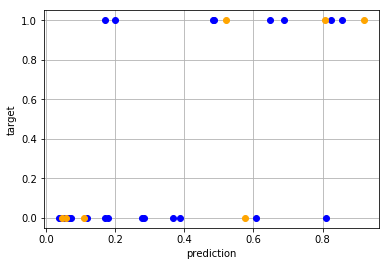

In [14]:
# visualize
plt.xlabel('prediction')
plt.ylabel('target')
plt.grid(True)

# plot prediction and target(answer) and seeing the graphs we decide a threshold to judge whether 0 or 1
plt.plot(prob_train, Y_train, 'o', color='blue')
plt.plot(prob_val, Y_val, 'o', color='orange')

In [15]:
# if we set threshold to 0.5
threshold = 0.5

preds_train = np.where(prob_train < threshold, 0, 1)
preds_val = np.where(prob_val < threshold, 0, 1)

In [16]:
cm_train = confusion_matrix(Y_train, preds_train)
cm_val = confusion_matrix(Y_val, preds_val)

In [17]:
# Confusion matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# precision and recall of of validation data
print('Train precision : {0}'.format(precision_score(Y_train, preds_train)))
print('Train recall : {0}'.format(recall_score(Y_train, preds_train)))

# train data
pd.DataFrame(cm_train, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])

Train precision : 0.6666666666666666
Train recall : 0.5


,pred_0,pred_1
true_0,15,2
true_1,4,4


In [18]:
# precision and recall of validation data
print('Validation precision : {0}'.format(precision_score(Y_val, preds_val)))
print('Validation recall : {0}'.format(recall_score(Y_val, preds_val)))

# validation data
pd.DataFrame(cm_val, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])

Validation precision : 0.75
Validation recall : 1.0


,pred_0,pred_1
true_0,3,1
true_1,0,3
